##### 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [1]:
import os, shutil

original_dataset_dir = 'D:/Data/cat dog/train/train'

base_dir = 'D:/Data/cat dog/cats_and_dogs_small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#  os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('훈련용 고양이 이미지 전체 개수: ', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수: ', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수: ', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수: ', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수: ', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수: ', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수:  1000
훈련용 강아지 이미지 전체 개수:  1000
검증용 고양이 이미지 전체 개수:  500
검증용 강아지 이미지 전체 개수:  500
테스트용 고양이 이미지 전체 개수:  500
테스트용 강아지 이미지 전체 개수:  500


##### 네트워크 구성하기

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics = ['acc'])

##### 데이터 전처리

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

validation_generator= test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기: ', data_batch.shape)
    print('배치 레이블 크기: ', labels_batch.shape)
    break

배치 데이터 크기:  (20, 150, 150, 3)
배치 레이블 크기:  (20,)


In [7]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 100,
        epochs = 30,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/30


C:\Users\jiyou\AppData\Local\Temp\ipykernel_52408\3018243495.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 52s 511ms/step - loss: 0.6921 - acc: 0.5265 - val_loss: 0.6836 - val_acc: 0.5040
Epoch 2/30
100/100 [==============================] - 31s 307ms/step - loss: 0.6662 - acc: 0.5955 - val_loss: 0.6537 - val_acc: 0.6220
Epoch 3/30
100/100 [==============================] - 32s 317ms/step - loss: 0.6387 - acc: 0.6260 - val_loss: 0.6319 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 31s 312ms/step - loss: 0.5925 - acc: 0.6715 - val_loss: 0.6288 - val_acc: 0.6330
Epoch 5/30
100/100 [==============================] - 32s 319ms/step - loss: 0.5458 - acc: 0.7185 - val_loss: 0.6101 - val_acc: 0.6640
Epoch 6/30
100/100 [==============================] - 31s 313ms/step - loss: 0.5103 - acc: 0.7515 - val_loss: 0.5732 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 31s 312ms/step - loss: 0.4824 - acc: 0.7780 - val_loss: 0.5635 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 31s 312ms/st

In [8]:
model.save('cats_and_dogs_small_1.h5')

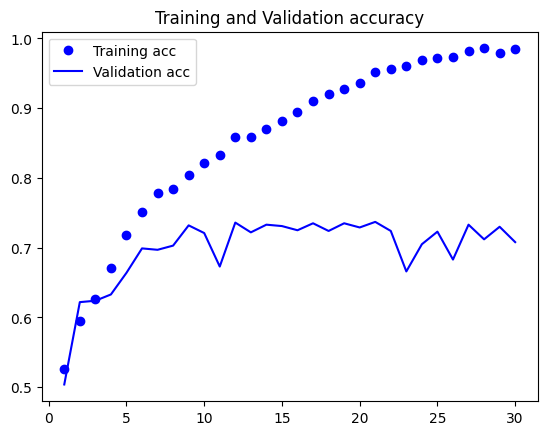

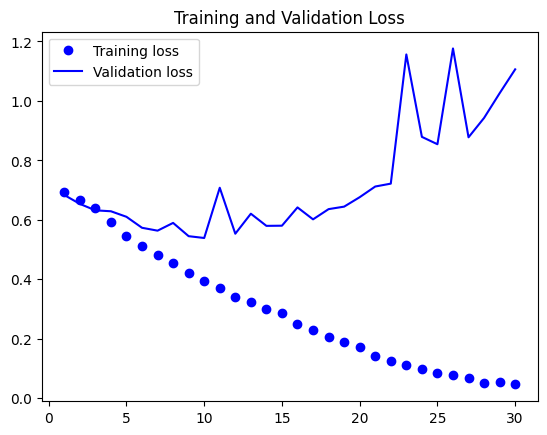

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [12]:
datagen = ImageDataGenerator(
        rotation_range = 20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode = 'nearest')

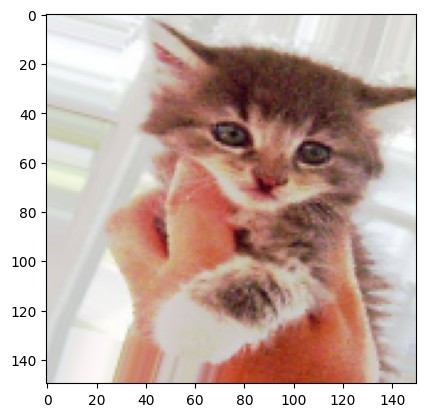

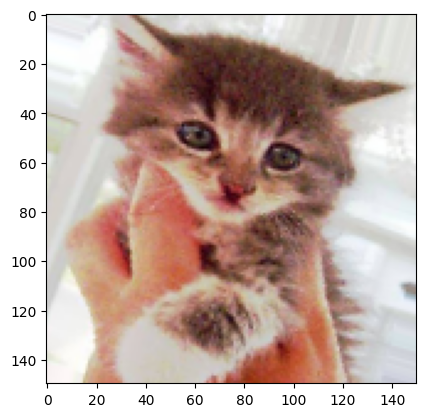

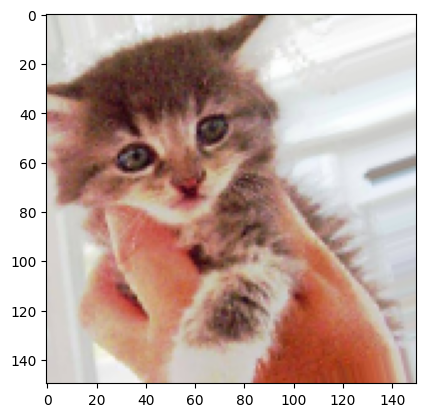

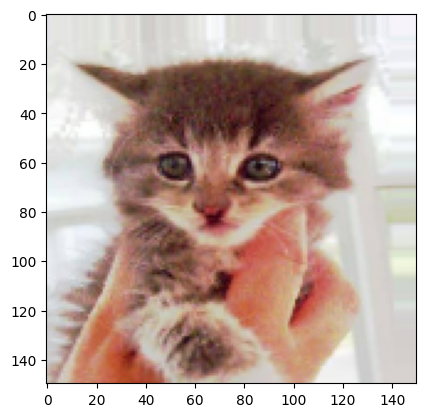

In [16]:
import keras.utils as image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [18]:
#Add drop out layer after flatten layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics = ['acc'])

In [ ]:
!pip uninstall keras
!pip install tensorflow

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\jiyou\AppData\Local\Temp\ipykernel_52408\1847568838.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 74s 737ms/step - loss: 0.6866 - acc: 0.5435 - val_loss: 0.6705 - val_acc: 0.5840


In [21]:
model.save('cats_and_dogs_small_2.h5')

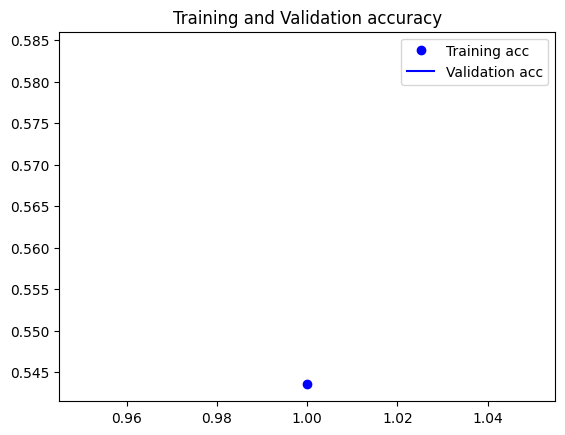

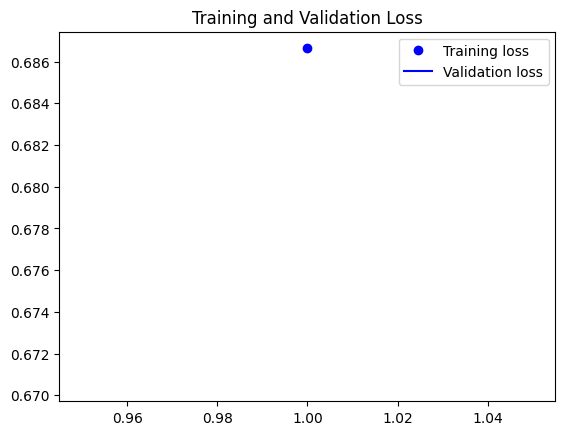

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()